11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Feature shape: (784,)


/opt/homebrew/anaconda3/envs/tf_macos/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-10 18:36:20.829819: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-10 18:36:20.829854: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-10 18:36:20.829861: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-10 18:36:20.830218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-10 18:36:20.830642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Epoch 1/10


2025-09-10 18:36:22.017397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8679 - loss: 0.4501 - val_accuracy: 0.9139 - val_loss: 0.3055
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9055 - loss: 0.3403 - val_accuracy: 0.9109 - val_loss: 0.3219
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8934 - loss: 0.4013 - val_accuracy: 0.8917 - val_loss: 0.4488
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8760 - loss: 0.5402 - val_accuracy: 0.8391 - val_loss: 0.7142
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8514 - loss: 0.8263 - val_accuracy: 0.8217 - val_loss: 0.9126
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8470 - loss: 1.0301 - val_accuracy: 0.8562 - val_loss: 1.1394
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8450 - loss: 1.1942 - val_accuracy: 0.8670 - val_loss: 1.0665
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8310 - loss: 1.7007 - val_accuracy: 0.848

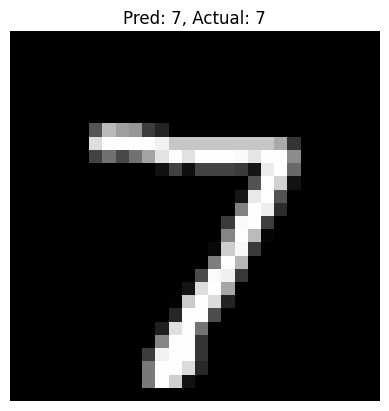

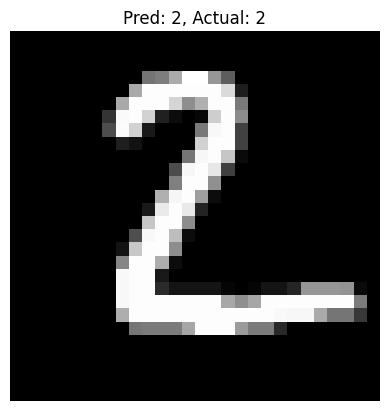

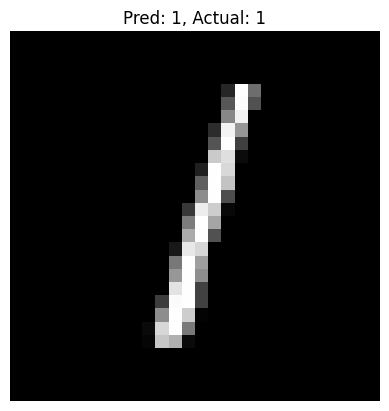

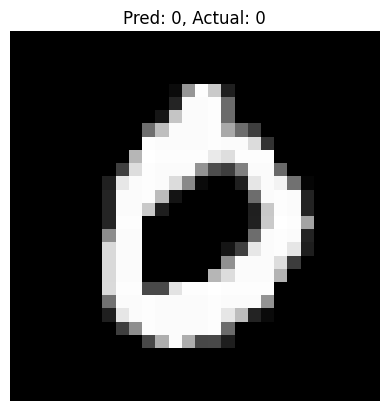

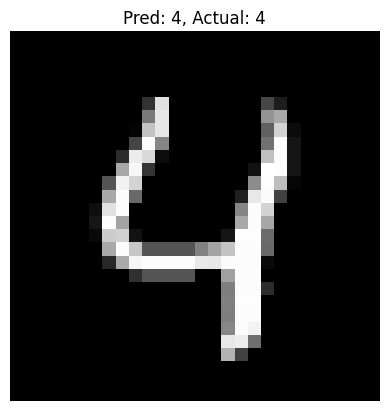

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Params
feature_vector_length = 784
num_classes = 10

# Load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Preprocess
X_train = X_train.reshape(X_train.shape[0], feature_vector_length).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], feature_vector_length).astype('float32') / 255
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Evaluate
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

# Predict + show
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:5], axis=1)

for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()
